<a href="https://colab.research.google.com/github/Ishikaaa/ML-Classification-of-Nepal-earthquake-tweets/blob/master/ML_Classification_of_Nepal_earthquake_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About The Twitter Post - **

Microblogging sites like Twitter are increasingly being used for aiding relief operations during various mass emergencies.  A lot of critical situational information is posted on microblogging sites during disaster events. However, messages posted on microblogging sites often contain rumors and overstated facts. In such situations, identification of factual tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity  and resource availability.

**Aim of The Project - **

 identify the tweets that talk about the need of resources or availability of resources
 
 **About The Dataset - **
 
 The text file contains tuples in the form:
(target class , Tweet id , Tweet’s text)

Class Description:

*   0:The tweet doesn’t talk about any resources needed or available(Irrelevant tweets)
*   1:The tweet mentions a resource that is needed (Need Tweets)
*   2:The tweet mentions a resource that is available(Availability tweets)




# ***Importing Libraries - ***

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics 
import seaborn as sns 

# ***Importing dataset - ***

In [0]:
colnames=['target_class','Tweet_id','Tweet’s_text']
dataset=pd.read_csv("Train.txt",names=colnames, header=None)
dataset.head()

,target_class,Tweet_id,Tweet’s_text
0,(0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...
1,(0,'591779538046218240',"""The massacre of people's movement says peace..."
2,(0,'591728244925210624',"""I'm lonely"
3,(0,'591774433926193152','#nepal #news 6 billion collection collection...
4,(0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...


In [0]:
dataset.shape

(18086, 3)

In [0]:
dataset['target_class'] = dataset['target_class'].str.strip('(')
dataset['Tweet’s_text'] = dataset['Tweet’s_text'].str.strip(')')
dataset.head()

,target_class,Tweet_id,Tweet’s_text
0,0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...
1,0,'591779538046218240',"""The massacre of people's movement says peace..."
2,0,'591728244925210624',"""I'm lonely"
3,0,'591774433926193152','#nepal #news 6 billion collection collection...
4,0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...


In [0]:
dataset['target_class'].value_counts()

0    17223
2      664
1      199
Name: target_class, dtype: int64

In [0]:
dataset.dtypes

target_class    object
Tweet_id        object
Tweet’s_text    object
dtype: object

In [0]:
dataset.describe(include="all")

,target_class,Tweet_id,Tweet’s_text
count,18086,18086,18086
unique,3,18086,17399
top,0,'592628283176542208','Today
freq,17223,1,38


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18086 entries, 0 to 18085
Data columns (total 3 columns):
target_class    18086 non-null object
Tweet_id        18086 non-null object
Tweet’s_text    18086 non-null object
dtypes: object(3)
memory usage: 424.0+ KB


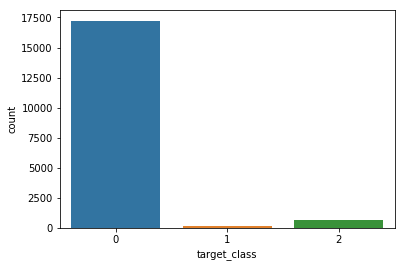

In [0]:
sns.countplot(x='target_class', data=dataset)

**Note - **

*    1:The tweet mentions a resource that is needed (Need Tweets)
*    2:The tweet mentions a resource that is available(Availability tweets)
*    0:The tweet doesn’t talk about any resources needed or available(Irrelevant tweets)

# ***Check Missing Values - ***

In [0]:
dataset.isnull().sum()

target_class    0
Tweet_id        0
Tweet’s_text    0
dtype: int64

# ***Splitting Dataset - ***

In [0]:
X=dataset['Tweet’s_text']
Y=dataset['target_class']

In [0]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

# ***Feature Extraction - ***

Feature Extraction means converting categorical data into numerical data. 

**TF-IDF - **

TF-IDF ---> Term Frequency-Inverse Document Frequency. It tells that how often a word occur in a document. 

In [0]:
# TF-IDF for X_train data 
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer=TfidfVectorizer(ngram_range = [1,2])
dtm_train=Vectorizer.fit_transform(X_train)

In [0]:
# TF-IDF for X_test 
from sklearn.feature_extraction.text import TfidfVectorizer
dtm_test=Vectorizer.fit_transform(X_test)

In [0]:
print(Vectorizer.vocabulary_)

In [0]:
dtm_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
dtm_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
print("Shape of test:",dtm_test.shape)
print("Shape of train:",dtm_train.shape)

Shape of test: (4522, 38563)
Shape of train: (13564, 86219)


# ***Chi-Squared Test - ***

Chi-Squared Test is for feature selection which is a process of extracting the most irrelevant features from dataset and then applying machine learning algorithm for better performance. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting. 


Chi-Squared Test is used for categorical features in dataset. We calculate Chi-Squared features between each feature and the target and select the desired numebr of features with best Chi-squared scores. 

Chi-Squared score is given by :- 

X^2=(obersved frequency-expected frequency)^2/(Expected Frequency)
where observed frequency is the data that we actually observed and expected freaquency comes from predicted data . 



In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
chichi=SelectKBest(chi2,k=2)
dtm_train_chi=chichi.fit_transform(dtm_train,Y_train)

# ***Modeling The Dataset -***

**Logistic Regression - **

Task of Logistic Regression - To draw a line such that it best seperate dataset into 2 or more groups. 

In [0]:
from sklearn.linear_model import LogisticRegression 
classifierr=LogisticRegression()
classifierr.fit(dtm_train_chi,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# ***Making The Predictions - ***

In [0]:
chichi_test=SelectKBest(chi2,k=2)
dtm_test_chi=chichi_test.fit_transform(dtm_test,Y_test)

In [0]:
Y_pred=classifierr.predict(dtm_test_chi)

# ***Accuracy Of Model - ***

In [0]:
from sklearn import metrics 

**1. Accuracy Score -**

In [0]:
metrics.accuracy_score(Y_test,Y_pred)

0.955329500221141

**2. Confusion Report - **

In [0]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4315
           1       0.00      0.00      0.00        56
           2       0.67      0.07      0.12       151

   micro avg       0.96      0.96      0.96      4522
   macro avg       0.54      0.36      0.37      4522
weighted avg       0.93      0.96      0.94      4522



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
